# Spam Mail Detection Notebook

## Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
from collections import Counter
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix
import pickle

## Load Dataset

In [ ]:
df = pd.read_csv('spam.csv', encoding='latin1')
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)
df.rename(columns={'v1':'target','v2':'text'}, inplace=True)
df.drop_duplicates(inplace=True)
df.sample(5)

,target,text
4218,ham,Anything lor if they all go then i go lor...
2057,ham,"Nothing, i got msg frm tht unknown no.."
5092,ham,"My fri ah... Okie lor,goin 4 my drivin den go ..."
1511,ham,Oops sorry. Just to check that you don't mind ...
712,spam,08714712388 between 10am-7pm Cost 10p


## Encode Target

In [ ]:
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


## PreProcessing

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
ps = PorterStemmer()


def transform_text(text):
    text = text.lower()
    tokens = nltk.word_tokenize(text)
    tokens = [t for t in tokens if t.isalnum()]
    tokens = [t for t in tokens if t not in stopwords.words('english') and t not in string.punctuation]
    tokens = [ps.stem(t) for t in tokens]
    return " ".join(tokens)



df['transformed_text'] = df['text'].apply(transform_text)
df.head()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Swarnadwip_Sarkar\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Swarnadwip_Sarkar\AppData\Roaming\nltk_data..
[nltk_data]     .
[nltk_data]   Package stopwords is already up-to-date!


,target,text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",nah think goe usf live around though


## EDA (Optional)

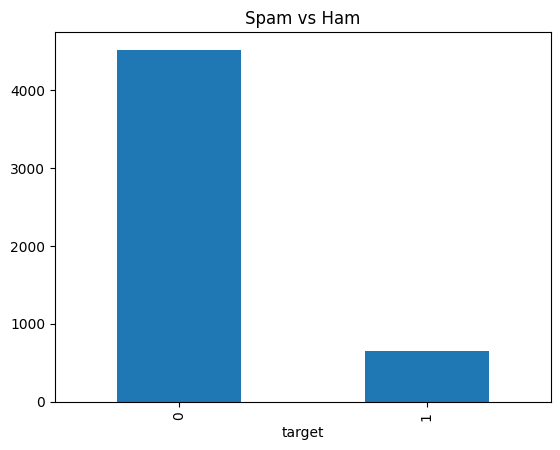

In [ ]:
df['target'].value_counts().plot(kind='bar', title='Spam vs Ham')
plt.show()

## Vectorization

In [ ]:
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

## Train/Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

## Train Model

In [ ]:
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,fit_prior,True
,class_prior,None


## Evaluate Model

In [ ]:
y_pred = mnb.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9709864603481625
Precision: 1.0
Confusion Matrix:
 [[896   0]
 [ 30 108]]


## Save Model and Vectorizer

In [ ]:
pickle.dump(tfidf, open('vectorizer.pkl','wb'))
pickle.dump(mnb, open('model.pkl','wb'))
print("Model and vectorizer saved successfully!")

Model and vectorizer saved successfully!
